In [1]:
%matplotlib qt

In [2]:
#%% Import the necessary modules
import os
import matplotlib.pyplot as plt
import mne
import numpy as np
from sklearn.linear_model import LogisticRegression

In [3]:
#%% load all the epochs (see slide 4)

# set the verbosity of messages
mne.set_log_level('error') 


In [4]:

# Change the following path to where the folder ds000117 is on your disk
data_path = 'C:/Users/mvmigem/Documents/cutting_gardens_workshop/workshop_2/ds000117_pruned'
epochs_fname = os.path.join(data_path,
    'derivatives/meg_derivatives/sub-01/ses-meg/meg/sub-01_ses-meg_task-facerecognition_run-01_proc-sss-epo.fif')

# read epoched dataset
epochs = mne.read_epochs(epochs_fname)

In [5]:
#%% choose between using MEG or EEG data, choose MEG at the start
channel = "meg"

if channel == "meg":
    epochs = epochs.pick_types("grad") # gradiometers (meg)
else:
    epochs = epochs.pick_channels(['EEG001', 'EEG002', 'EEG003', 'EEG004', 
                                   'EEG005', 'EEG006', 'EEG007', 'EEG008', 
                                   'EEG009', 'EEG010', 'EEG011', 'EEG012', 
                                   'EEG013', 'EEG014', 'EEG015', 'EEG016', 
                                   'EEG017', 'EEG018', 'EEG019', 'EEG020', 
                                   'EEG021', 'EEG022', 'EEG023', 'EEG024', 
                                   'EEG025', 'EEG026', 'EEG027', 'EEG028', 
                                   'EEG029', 'EEG030', 'EEG031', 'EEG032', 
                                   'EEG033', 'EEG034', 'EEG035', 'EEG036', 
                                   'EEG037', 'EEG038', 'EEG039', 'EEG040', 
                                   'EEG041', 'EEG042', 'EEG043', 'EEG044', 
                                   'EEG045', 'EEG046', 'EEG047', 'EEG048', 
                                   'EEG049', 'EEG050', 'EEG051', 'EEG052', 
                                   'EEG053', 'EEG054', 'EEG055', 'EEG056', 
                                   'EEG057', 'EEG058', 'EEG059', 'EEG060', 
                                   'EEG065', 'EEG066', 'EEG067', 'EEG068', 
                                   'EEG069', 'EEG070', 'EEG071', 'EEG072', 
                                   'EEG073', 'EEG074']) # electrodes (EEG)

# print all the information about the dataset
print(epochs.info)
# print the event number and condition info for each type of trial
# have a look at the output
print(epochs.event_id)

<Info | 24 non-empty values
 acq_pars: ACQch001 110113 ACQch002 110112 ACQch003 110111 ACQch004 110122 ...
 bads: []
 ch_names: MEG0113, MEG0112, MEG0122, MEG0123, MEG0132, MEG0133, MEG0143, ...
 chs: 204 Gradiometers
 custom_ref_applied: False
 description: (meg) Vectorview system at Cambridge
 dev_head_t: MEG device -> head transform
 dig: 137 items (3 Cardinal, 5 HPI, 75 EEG, 54 Extra)
 events: 1 item (list)
 experimenter: MEG
 file_id: 4 items (dict)
 highpass: 0.0 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 hpi_subsystem: 2 items (dict)
 line_freq: 50.0
 lowpass: 40.0 Hz
 meas_date: 1941-03-22 11:04:14 UTC
 meas_id: 4 items (dict)
 nchan: 204
 proc_history: 1 item (list)
 proj_id: 1 item (ndarray)
 proj_name: dgw_studies
 projs: EOG-planar--0.200-0.200-PCA-01: on, ECG-planar-- ...
 sfreq: 300.0 Hz
 subject_info: 2 items (dict)
>
{'face/famous/first': 5, 'face/famous/immediate': 6, 'face/famous/long': 7, 'face/unfamiliar/first': 13, 'face/unfamiliar/immediate': 14, 'fa

In [6]:
#%% crop the epochs (the longer the epoch, the more time the heavier decoding 
# stuff down below will take)
epochs.crop(-0.25, 0.45)


Number of events,145
Events,face/famous/first: 24face/famous/immediate: 10face/famous/long: 14face/unfamiliar/first: 25face/unfamiliar/immediate: 12face/unfamiliar/long: 10scrambled/first: 25scrambled/immediate: 14scrambled/long: 11
Time range,-0.250 – 0.450 s
Baseline,-0.200 – 0.000 s


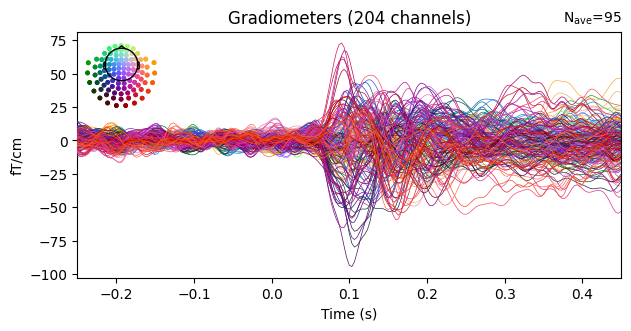

In [7]:
#%% visualize the ERF of different conditions

# create an average at each channel of all trials in the 'face' conditions
evoked_face = epochs['face'].average() 
evoked_face.plot() # plot the ERF


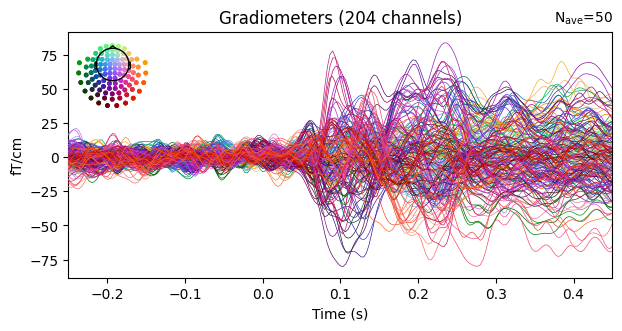

In [8]:

# create an average at each channel of all trials in the 'scrambled' conditions
evoked_scrambled = epochs['scrambled'].average()# complete the code here                                    
evoked_scrambled.plot() # plot the ERF



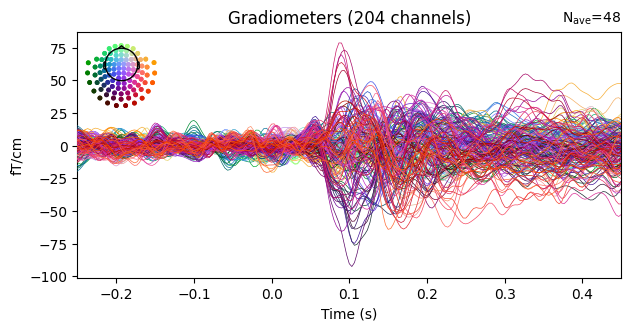

In [9]:

#%% hierarchical event ID's

# MNE has a hierarchical system for event ID's. For example 'face' 
# as used above, pooled all of these distinct conditions:
    # 'face/famous/first': 24
    # 'face/famous/immediate': 10
    # 'face/famous/long': 14
    # 'face/unfamiliar/first': 25
    # 'face/unfamiliar/immediate': 12
    # 'face/unfamiliar/long': 10
    # The plots we made above show the number of trials averaged. You can see 
    # if it checks out.

# 'face/famous' will pool these conditions:
    # 'face/famous/first': 24
    # 'face/famous/immediate': 10
    # 'face/famous/long': 14   

# you can compare the numbers of trials indicated on the plot to check how trials 
# from different conditions are pooled and if the numbers check out
evoked_face_famous = epochs['face/famous'].average()# complete the code here to plot ERF of famous faces      @
evoked_face_famous.plot()


In [13]:
epochs.events

array([[ 81612,      0,     17],
       [ 82539,      0,     15],
       [ 88327,      0,      5],
       [ 89279,      0,     15],
       [ 90227,      0,     17],
       [ 91219,      0,     18],
       [ 92156,      0,      7],
       [ 93148,      0,     17],
       [ 94125,      0,     18],
       [ 95068,      0,     19],
       [ 95965,      0,      5],
       [ 96922,      0,      7],
       [ 98836,      0,      6],
       [ 99768,      0,     17],
       [103582,      0,     14],
       [104489,      0,     17],
       [105422,      0,      7],
       [106374,      0,     17],
       [107326,      0,     18],
       [108323,      0,     13],
       [109260,      0,     14],
       [110228,      0,     19],
       [111185,      0,     17],
       [112122,      0,     18],
       [113069,      0,     15],
       [114077,      0,     13],
       [115029,      0,     14],
       [115951,      0,     17],
       [116923,      0,     18],
       [117890,      0,     19],
       [11

In [ ]:
#%% Let's start decoding

# Our goal will be to classify epochs into faces and scrambled faces,
# based on neural activity. 
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Slide 5-7


In [11]:
#%% prepare our data for classification

# First we need to get the same number of trials in each condition. If we don't
# then chance level will not be 50%, but the proportion. 
# How many trials do you expect to end up with in total?
epochs.equalize_event_counts(['face', 'scrambled'])
events = epochs.events


In [12]:

# Create a response vector that describes for each trial, whether the trial was 
# a face or a scrambled trial (1 for face, 0 for scrambled). 
y = np.zeros(len(epochs.events), dtype=int) # initialize with zeros 
y[epochs.events[:, 2] < 17] = 1  # and then set face trials to 1
y.size # check the length, does it match the trial count?

# put the EEG data into a NumPy array
X = epochs.get_data()
# write one short command to check the shape of X.
                                                                              #@
# what does each dimension represent?

In [16]:
np.shape(X)

(100, 204, 211)

In [17]:
#%% decoding the stimulus (face vs scrambled) based on spatial and temporal dynamics

# we use a logistic regression model and import this from scikit learn:
    # Logistic regression is a supervised machine learning algorithm mainly used 
    # for classification tasks where the goal is to predict the probability that 
    # an instance belongs to a given class. 
    # Logistic regression is a special case of General Linear Models.
    # To learn more about how logistic regression is used in classification:
    # https://youtu.be/vN5cNN2-HWE?feature=shared
    

from sklearn.linear_model import LogisticRegression

# We create the classifier:
    # We set the parameters (regularization value and solver):
    # Regularization is a procedure used to calibrate the model and prevent
    # over- or underfitting. We are being vague on purpose, its beyond the scope
    # of this tutorial.
    # The online solver “liblinear” is a type of optimization algorithm that 
    # updates its parameters incrementally as it processes each data point. 
    # This approach is often used in large-scale machine learning applications, 
    # where it is not feasible to process all the data at once due to memory or 
    # computational constraints. More here: https://tinyurl.com/48sjkd43
logreg = LogisticRegression(C=1e6, solver='liblinear')

# use the mne.decoding module to manage our classification
from sklearn.pipeline import make_pipeline

# A pipeline is used in ML to remove the redundant steps of having to call 
# the method fit and transform on every estimator and/or transformer. 
# Calling the method fit once directly from the pipeline suffices.
# Transformers are usually combined with estimators to build a pipeline.
# The estimator in this case refers to the LogisticRegression classifier.
# A transformer manipulates the predictors (X) in some ways such that it is 
# ready to be consumed by machine learning algorithms. Some examples are scaling 
# of continuous predictors or encoding categorical predictors. 

from mne.decoding import Scaler, Vectorizer, cross_val_multiscore

# The transformer "mne.decoding.Scaler" standardizes the data based on channel 
# scales. 
# Scikit-learn transformers and estimators generally expect 2D data 
# (n_samples * n_features), whereas MNE transformers typically output data with 
# a higher dimensionality (e.g. n_samples * n_channels * n_frequencies * n_times). 
# The transformer "mne.decoding.Vectorizer" needs to be applied between the MNE 
# and the scikit-learn steps.

# We make a pipeline object that specifies how to handle the data.
clf = make_pipeline(Scaler(epochs.info),
                    Vectorizer(),
                    logreg) # the classifier defined above


In [18]:

# Now let's run the classification and get the scores for each fold 
scores = cross_val_multiscore(clf, X, y, cv=5, n_jobs=1)

# Let's compute the mean scores across cross-validation splits.
# The score is calculated by averaging decoding performance on the test data 
# for each of the 5 folds
score = np.mean(scores, axis=0)
print('Spatio-temporal: %0.1f%%' % (100 * score,))


Spatio-temporal: 93.0%


In [20]:
#%% 
# In the previous step, we saw how well the classifier was able to decode the 
# condition of each trial based on spatio-temporal data.

# Decoding over time works by fitting the model on spatial data at each time point.

# The mne.decoding.SlidingEstimator will take as input a pair of features X
# and targets y where X has more than 2 dimensions. For decoding over time the 
# data X is the epochs data of shape n_epochs × n_channels × n_times. As the 
# last dimension of X is the time, an estimator will be fit on every time instant.

# When working with linear models as estimators, this approach boils down to 
# estimating a discriminative spatial filter for each time instant.

from sklearn.preprocessing import StandardScaler
from mne.decoding import SlidingEstimator

# We prepare a pipeline again. Try to see why we don't need to use a 
# vectorizer this time.
clf = make_pipeline(StandardScaler(), logreg)

# Now wrap this pipeline in a sliding estimator. That means that whatever
# is designated as the "base estimator" will be repeated for each subset of the 
# data along the last dimension. # What is the last dimension of the data? 
X.shape

# As the base estimator, we enter clf, the classifier we just defined.
time_decod = SlidingEstimator(clf, n_jobs=1, scoring='roc_auc', verbose=True)
# The scoring is done by calculating the area under the receiver operating 
# characteristic curve (AUC-ROC). The ROC curve plots the True Positive Rate 
# against the False Positive Rate for different threshold values. 
# A high AUC-ROC value suggests that the model is capable of distinguishing 
# between the positive and negative classes effectively, irrespective of the 
# classification threshold. AUC-ROC serves as a single scalar value that 
# summarizes the trade-off between sensitivity (True Positive Rate) and 
# specificity (1 - False Positive Rate) across all possible classification 
# thresholds. Models with higher AUC-ROC discriminate better between classes.

# Write the command to score the model. how many scores do you expect to get? 
scores = cross_val_multiscore(time_decod, X, y, cv=5, n_jobs=1)                                                                      #@

# Mean scores across cross-validation splits:
scores = np.mean(scores, axis=0) 

# prepare plot
fig, ax = plt.subplots()

# plot scores and chance level
ax.plot(epochs.times, scores, label='score')
ax.axhline(.5, color='k', linestyle='--', label='chance')
ax.axvline(.0, color='k', linestyle='-')  # mark time 0

# set axis labels, legend, title
ax.set_xlabel('Times')
ax.set_ylabel('AUC')  # Area Under the Curve
ax.legend()

ax.set_title('Sensor space decoding')

plt.show()


c:\Users\mvmigem\AppData\Local\miniconda3\envs\mne\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [22]:
#%% Temporal generalization analysis

# With decoding over time, we saw how well the classifier was able to decode the 
# condition of each trial at each timepoint (based on spatial data). Temporal 
# generalization is an extension of the decoding over time approach. It consists 
# in evaluating how well the model (spatial filter) estimated at a particular time 
# point accurately classifies the trials on the other timepoints.

# define the Temporal generalization object
from mne.decoding import GeneralizingEstimator

# Instead of wrapping our classifier in the SlidingEstimator, we wrap it in
# the GeneralizingEstimator. 
time_gen = GeneralizingEstimator(clf, n_jobs=1, scoring='roc_auc', verbose=True) #complete that line to create the estimator @

# How many scores do you expect now? 
# It's a big number, so it will take a lot of time to compute these scores. 
# To save time, you can reduce the number of folds to 3, or further crop 
# the epochs (way above)
scores = cross_val_multiscore(time_gen, X, y, cv=5, n_jobs=None) 
print(scores.shape)

# Mean scores across cross-validation splits
scores = np.mean(scores, axis=0)
print(scores.shape)

# Plot the diagonal (does this plot look familiar?)
# (If you've changed the number of folds it might look slightly different.)
fig, ax = plt.subplots()
ax.plot(epochs.times, np.diag(scores), label="score")
ax.axhline(0.5, color="k", linestyle="--", label="chance")
ax.set_xlabel("Times")
ax.set_ylabel("AUC")
ax.legend()
ax.axvline(0.0, color="k", linestyle="-")
ax.set_title("Decoding MEG sensors over time")

# plot the full generalization matrix
fig, ax = plt.subplots(1, 1)
im = ax.imshow(
    scores,
    interpolation="lanczos",
    origin="lower",
    cmap="RdBu_r",
    extent=epochs.times[[0, -1, 0, -1]],
    vmin=0.0,
    vmax=1.0,
)
ax.set_xlabel("Testing Time (s)")
ax.set_ylabel("Training Time (s)")
ax.set_title("Temporal generalization")
ax.axvline(0, color="k")
ax.axhline(0, color="k")
cbar = plt.colorbar(im, ax=ax)
cbar.set_label("AUC")

(5, 211, 211)
(211, 211)


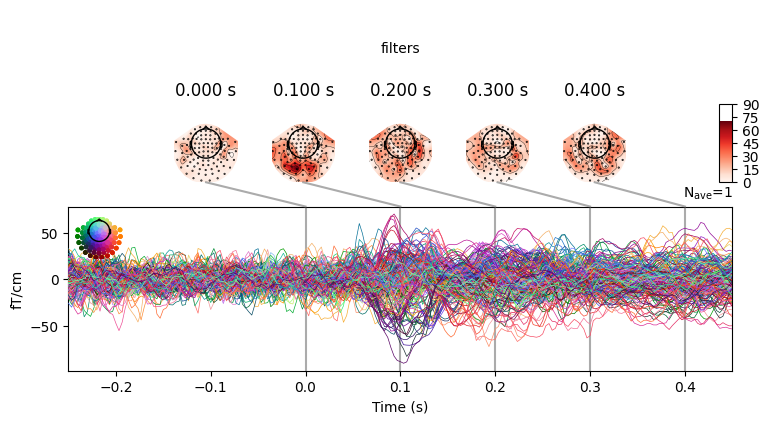

In [24]:
#%% Bonus material

#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Slide 13

# What the algorithm does, in effect, is create a spatial filter at each timepoint
# that best discriminates the two conditions. To see these spatial filters
# we can plot their weights. You can retrieve the spatial filters if you 
# explicitly use a LinearModel:
    
from mne.decoding import get_coef, LinearModel
from mne import EvokedArray
    
clf = make_pipeline(
    StandardScaler(), LinearModel(LogisticRegression(solver="liblinear"))
)
time_decod = SlidingEstimator(clf, n_jobs=None, scoring="roc_auc", verbose=True)
time_decod.fit(X, y)

# Plot topomaps of spatial filters at different time-points

# retrieve the filter weights
coef_filt = get_coef(time_decod, "filters_", inverse_transform=True) 
# construct the timecourse of the filterweights
evoked_time_decod_filt = EvokedArray(coef_filt, epochs.info, tmin=epochs.times[0]) 
# define some plotting params
joint_kwargs = dict(ts_args=dict(time_unit="s"), topomap_args=dict(time_unit="s"))
# plot
evoked_time_decod_filt.plot_joint(
    times=np.arange(0.0, 0.500, 0.100), title="filters", **joint_kwargs
)   


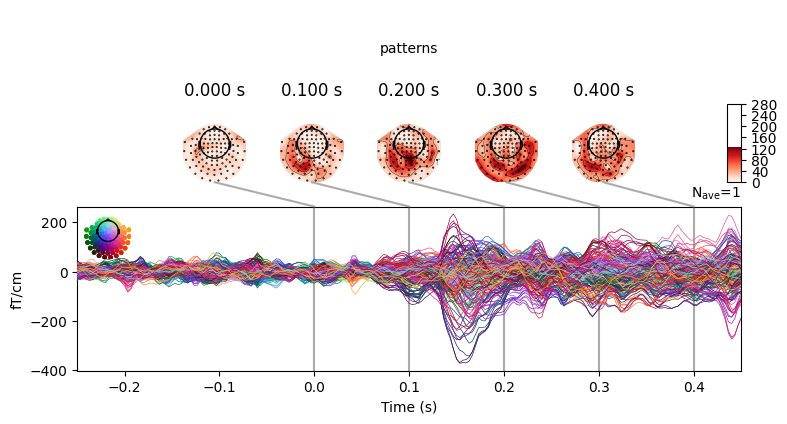

In [25]:

# How do you think this looks? Can you interpret this topography?
# To create a more interpretable situation, we can plot the "spatial patterns".
# While the spatial filter is the backward model (created to decode the mental 
# representation from the data), spatial patterns are the result of transforming 
# the backward model to a forward model, which is interpretable.
# For a more detailed explanation see Haufe et al. (2014).

#retrieve the pattern weights
coef_pat = get_coef(time_decod, "patterns_", inverse_transform=True) 
# construct the timecourse of the filterweights
evoked_time_decod_pat = EvokedArray(coef_pat, epochs.info, tmin=epochs.times[0])
# plot
evoked_time_decod_pat.plot_joint(
    times=np.arange(0.0, 0.500, 0.100), title="patterns", **joint_kwargs
)   

# That's cool. Now write some code to plot the spatial filter and  
# activity patterns at the time-point where the decoding score is maximal.


In [26]:

# Calculate the scores                                                        #@
scores = cross_val_multiscore(time_decod, X, y, cv=5, n_jobs=None) 
# Mean scores across cross-validation splits:
scores = np.mean(scores, axis=0)


In [29]:
# Find spatial filter with max score
maximal_topo = np.argmax(scores)

# Plot the topography of the activity patterns
evoked_time_decod_filt.plot_topomap(maximal_topo)
# Plot the topography of the spatial filter
   


ValueError: Times should be between -0.25 and 0.45.

In [ ]:
#%% More bonus material

# 1. Try to decode famous vs. unfamiliar faces
idx_scram_event = epochs.events[:,2] > 15  # the index of "scrambled face" event 

epochs_face = epochs.copy()                
epochs_face.drop(idx_scram_event, reason = "drop scrambled") # the epochs of all face events

print(epochs_face.events) 

# prepare our data for classification
epochs_face.equalize_event_counts(['famous', 'unfamiliar'])
events = epochs_face.events

# create response vector, that describes for each trial, whether the trial was a famous or a unfamiliar trial.
y = np.zeros(len(events), dtype=int) # initialize with zeros
y[events[:, 2] < 13] = 1  # 1 means famous face
y.size # check the length

# fetch the data
X = epochs_face.get_data()
X.shape #  (observations x channels x time)

# now that you made a new "X" array you can rerun the cells above 
